# Introduction 
## Explication de l'outil
Ce carnet permet de compiler du code en python avec des interlude textuelles. Il permet de générer tous les graphiques de résultats d'indicateurs de la RE2020.
## Sommaire
1. Données d'entrées
2. RE2020
    2.1 Bbio  
    2.2 CEP & CEPnr  
    2.3 DH  
    2.4 Ic energie  
    2.5 Ic construction
   
3. RT2012
    3.1 Bbio  
    3.2 CEP  
    3.3 TIC  



In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from IPython.display import FileLink

# 1 Données d'entrées  
Rentrer les résultats des calculs RE et RT dans les cellules de code suivantes. Si un valeur n'est pas connues (par exemple pas d'ACV), alors laisser NC. 

## Paramètres graphiques

In [2]:
num_colors = 10
HeightBar = 6 #hauteur des bars
heightFond = 15 #hauteur du fond
graduationx = 10

## Titres, Sous-titre, Zone, Groupe, Infos

In [3]:
titre = "RE2020 : Résultats des indicateurs énergie" 
sousTitre = "Les objectifs sur le Bbio et le CEP sont bien respectés"
infos = "Projet GPMM - Calcul du 22/11 - Pléiades version 6.xx.xx.x - WSP France ©"

## 1.1 Bbio RE2020

In [4]:
BbioChaud = 35
BbioFroid = 12
BbioEcl = 10
Bbiomax = 66

## 1.2 CEP et CEPnr RE2020

In [5]:
CEPch = 15 #CEP chauffage
CEPfr = 15 #CEP climatisation
CEPecs = 15 #CEP eau chaude sanitaire
CEPecl = 15 #CEP éclairage
CEPauxV = 15 #CEP auxiliaires de ventilation
CEPauxD = 15 #CEP auxiliaires de distribution
CEPdep = 0 #CEP déplacements
CEPmax = 90# Seuil du CEP

CEPnrch = 6 #CEP chauffage
CEPnrfr = 11 #CEP climatisation
CEPnrecs = 8 #CEP eau chaude sanitaire
CEPnrecl = 5 #CEP éclairage
CEPnrauxV = 9 #CEP auxiliaires de ventilation
CEPnrauxD = 7 #CEP auxiliaires de distribution
CEPnrdep = 4 #CEP déplacements
CEPnrmax = 60# Seuil du CEP


## 1.3 Ic énergie et Ic construction

In [6]:
IcEelec = 120 #Ic de l'électricité
IcEbois = 24 #Ic du bois
IcErcu = 0 # Ic de réseau de chaleur et froid
IcEfioul = 0 #Ic du fioul
IcEgaz = 0 #Ic du gaz 

IcEmax = 200 #valeur max du Ic énergie

Les cases suivantes contiennent le code de calcul et de génération des graphiques. Il suffit de les exucuter pour faire apparaitre les graphiques correspondant. Elles ne doivent pas etre modifié si vous ne savez pas ce que vous faite. 

In [7]:
nbRange = num_colors #nombre de catégories fond
# données dérivées Bbio : 
bbio = BbioChaud +BbioFroid +BbioEcl
valuesBbio = [BbioChaud,BbioFroid,BbioEcl] #liste des données Bbio à plot en Bar empilées
labelsBbio = ["Chauffage", "Refroidissement", "Éclairage"]
colorsBbio = sns.color_palette("ch:s=0,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesBbio),desat=0.2)
extended_colorsBbio = sns.color_palette("ch:s=-.7,r=.1,d=0.25,l=.95,g=0.5,reverse=1", n_colors=nbRange)
valuesFondBbio = [Bbiomax / nbRange] * nbRange 
gaucheFondBbio = np.cumsum(valuesFondBbio)-valuesFondBbio[0]

# données dérivées CEP : 
CEP = CEPch+CEPfr+CEPecs+CEPecl+CEPauxV+CEPauxD+CEPdep
valuesCEP = [CEPch,CEPfr,CEPecs,CEPecl,CEPauxV,CEPauxD,CEPdep]
labelsCEP = ["Chauffage", "Climatisation", "ECS","Éclairage","Aux. de ventil.","Aux. de distrib.","Déplacements"]
colorsCEP = sns.color_palette("ch:s=-0,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesCEP),desat=0.2)
extended_colorsCEP = sns.color_palette("ch:s=-.15,r=.1,d=0.25,l=.95,g=0.5,reverse=1", n_colors=nbRange)
valuesFondCEP = [CEPmax / nbRange] * nbRange 
gaucheFondCEP = np.cumsum(valuesFondCEP)-valuesFondCEP[0]

# données dérivées CEPnr : 
CEPnr = CEPnrch+CEPnrfr+CEPnrecs+CEPnrecl+CEPnrauxV+CEPnrauxD+CEPnrdep
valuesCEPnr = [CEPnrch,CEPnrfr,CEPnrecs,CEPnrecl,CEPnrauxV,CEPnrauxD,CEPnrdep]
labelsCEPnr = ["Chauffage", "Climatisation", "ECS","Éclairage","Aux. de ventil.","Aux. de distrib.","Déplacements"]
colorsCEPnr = sns.color_palette("ch:s=-0.05,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesCEPnr),desat=0.2)
extended_colorsCEPnr = sns.color_palette("ch:s=0,r=.1,d=0.25,l=.95,g=0.5,reverse=1", n_colors=nbRange)
valuesFondCEPnr = [CEPnrmax / nbRange] * nbRange 
gaucheFondCEPnr = np.cumsum(valuesFondCEPnr)-valuesFondCEPnr[0]

# données dérivées IcE : 
IcE = IcEelec+IcEbois+IcErcu+IcEfioul+IcEgaz
valuesIcE = [IcEelec,IcEbois,IcErcu,IcEfioul,IcEgaz]
labelsIcE = ["Elec", "Bois", "RCU","Fioul","Gaz"]
colorsIcE = sns.color_palette("ch:s=0,r=.5,d=0.2,l=.75,reverse=1", n_colors=len(valuesIcE),desat=0.2)
extended_colorsIcE = sns.color_palette("ch:s=0.35,r=.1,d=0.25,l=.95,g=0.5,reverse=1", n_colors=nbRange)
valuesFondIcE = [IcEmax / nbRange] * nbRange 
gaucheFondIcE = np.cumsum(valuesFondIcE)-valuesFondIcE[0]

# vecteurs toute données pour légendes
seuils = [Bbiomax,CEPmax,CEPnrmax,IcEmax]
valeurs = [bbio,CEP,CEP,IcE]
labels = ["Bbio","CEP","CEPnr","Ic,energie"]

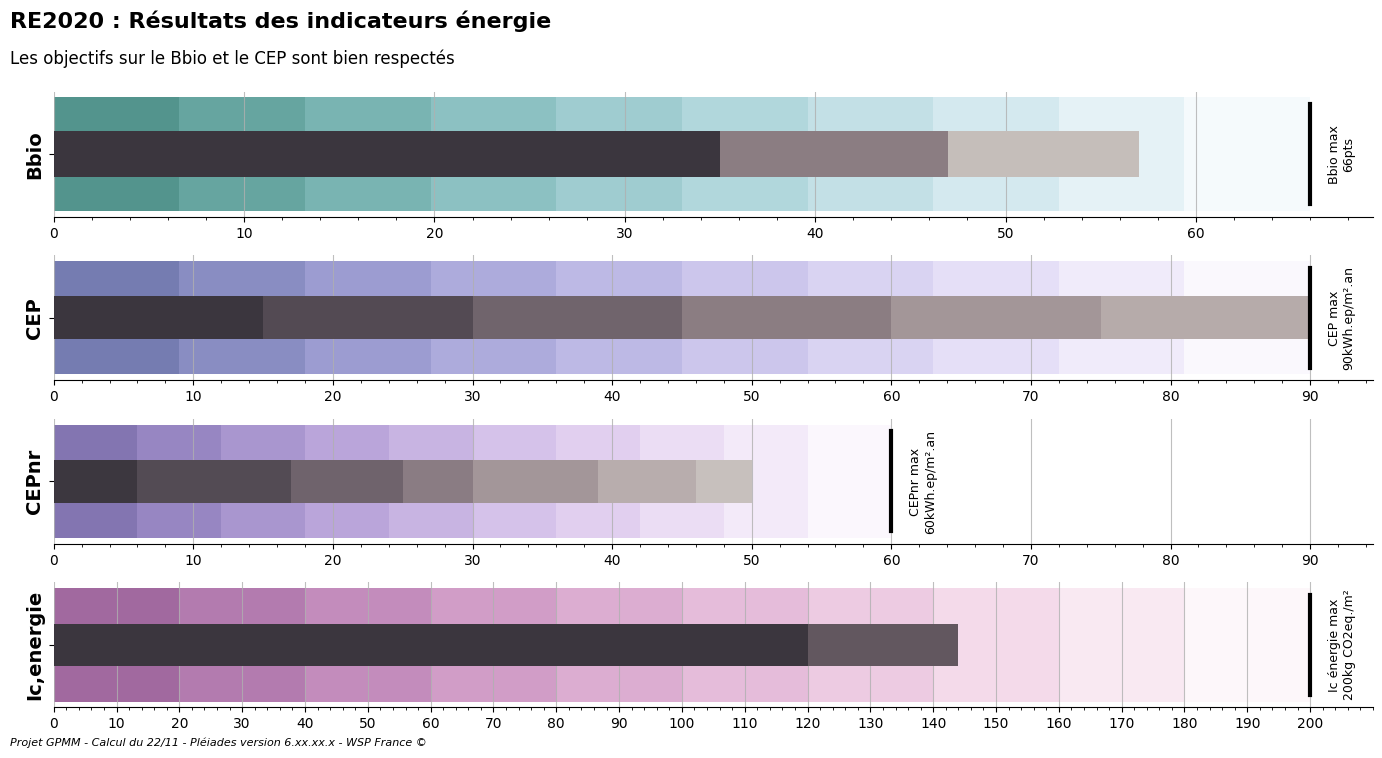

Lien de téléchargement du graph :


C:\Users\FRLC03195\RE2020 : Résultats des indicateurs énergie.png

In [9]:
#Creation de la figure et paramètrage des axes

fig, ax1 = plt.subplots(4,1)

#Bbio
ax1[0].barh(1,valuesFondBbio,left=gaucheFondBbio,height=15,color=extended_colorsBbio); #Compartiments du fond Bbio
ax1[0].barh(1,valuesBbio,color=colorsBbio,left=np.insert(np.cumsum(valuesBbio),0,0)[:-1],height=HeightBar,label=labelsBbio,zorder=3); #Bar empilée du Bbio
ax1[0].axvline(Bbiomax, color="black", ymin=0.10, ymax=0.9,linewidth=3); #bar cible Bbio max
ax1[0].text(1.025*Bbiomax,1,f"Bbio max\n{Bbiomax}pts",rotation=90,fontsize=9,ha='center',va='center') #Text Bbbio max

#CEP
ax1[1].barh(1,valuesFondCEP,left=gaucheFondCEP,height=HeightBar+10,color=extended_colorsCEP); #Compartiments du fond CEP
ax1[1].barh(1,valuesCEP,color=colorsCEP,left=np.insert(np.cumsum(valuesCEP),0,0)[:-1],height=HeightBar,label=labelsCEP,zorder=3);#Bar empilée du CEP
ax1[1].axvline(CEPmax, color="black", ymin=0.10, ymax=0.9,linewidth=3,zorder=4); #bar cible CEP max
ax1[1].text(1.025*CEPmax,1,f"CEP max\n{CEPmax}kWh.ep/m².an",rotation=90,fontsize=9,ha='center',va='center',zorder=4) #Text CEP max

#CEPnr
ax1[2].barh(1,valuesFondCEPnr,left=gaucheFondCEPnr,height=HeightBar+10,color=extended_colorsCEPnr); #Compartiments du fond CEPnr
ax1[2].barh(1,valuesCEPnr,color=colorsCEPnr,left=np.insert(np.cumsum(valuesCEPnr),0,0)[:-1],height=HeightBar,label=labelsCEPnr,zorder=3);#Bar empilée du CEPnr
ax1[2].axvline(CEPnrmax, color="black", ymin=0.10, ymax=0.9,linewidth=3,zorder=4); #bar cible CEPnr max
ax1[2].text(1.038*CEPnrmax,1,f"CEPnr max\n{CEPnrmax}kWh.ep/m².an",rotation=90,fontsize=9,ha='center',va='center',zorder=4) #Text CEPnr max

#CEPnr
ax1[3].barh(1,valuesFondIcE,left=gaucheFondIcE,height=HeightBar+10,color=extended_colorsIcE); #Compartiments du fond CEPnr
ax1[3].barh(1,valuesIcE,color=colorsIcE,left=np.insert(np.cumsum(valuesIcE),0,0)[:-1],height=HeightBar,label=labelsIcE,zorder=3);#Bar empilée du CEPnr
ax1[3].axvline(IcEmax, color="black", ymin=0.10, ymax=0.9,linewidth=3,zorder=4); #bar cible CEPnr max
ax1[3].text(1.025*IcEmax,1,f"Ic énergie max\n{IcEmax}kg CO2eq./m²",rotation=90,fontsize=9,ha='center',va='center',zorder=4) #Text CEPnr max

#taille du graph
fig.set_size_inches(35/2.54,17/2.54) #affichage
fig.set_dpi(100)

for i in range(4) :
    ax1[i].set_xlim(0, 1.05*max(seuils[i],valeurs[i]))  # Définit l'intervalle de l'axe x
    ax1[i].get_xaxis().tick_bottom()  # Active les ticks de l'axe x en bas
    ax1[i].set_yticks([1])
    ax1[i].set_yticklabels([labels[i]],rotation=90,fontsize=14,fontweight="bold",va='center')
    ax1[i].xaxis.grid(alpha=0.8,zorder=0)
    ax1[i].minorticks_on()
    ax1[i].set_xticks(np.arange(0, 1+max(seuils[i],valeurs[i]), graduationx))
    ax1[i].spines['top'].set_visible(False)
    ax1[i].spines['right'].set_visible(False)
    ax1[i].spines['left'].set_visible(False)
    ax1[i].spines['bottom'].set_visible(True)
    
fig.tight_layout()
fig.suptitle(titre, x=0, y=1.1, horizontalalignment='left',fontweight='bold',fontsize=16);
fig.text(0,1.02,sousTitre,horizontalalignment='left',fontsize=12);
fig.text(0,0,infos,horizontalalignment='left',fontsize=8,style="italic");


fig.savefig(f"{titre}.png",dpi=100,bbox_inches="tight")
plt.show()
print("Lien de téléchargement du graph :")
display(FileLink(f"{titre}.png"))
